# The Cumulative Distribution Function (CDF) - Lab

## Introduction
In the previous lesson we saw how we can use a discrete random variable used for modeling fair die having a uniform probabilities for all possible values. In this lab, we shall try to calculate a cdf for this variable and visualize it for inspection.

## Objectives
You will be able to:

* Calculate the cdf for a given discrete random variable
* Visualize the cdf using matplotlib 

## Calculating CDF in python 

Recall the formula for calculate the cumulative probability from previous lesson:

![](formula.png)

So given a list of all possible values of x, We can easily calculate the cdf for a given possible value (X) by performing following steps:

* Build a function `calculate_cdf(lst,X)`, where `lst` is a list of all possible values in a discrete variable x (6 values for a die roll), and X is the value for which we want to calculate the cumulative distribution function. 
* Initialize a count variable
* for all values in `lst`, if a value is less than X, add one to count - do nothing otherwise. (this will tell us total number of values less than X) 
* Calculate the cumulative probability of X dividing the count with total possible values
* Round off by 3 decimals and return the cumulative probability of X.  


In [1]:
def calculate_cdf(lst, X):
    count = 0
    for value in lst:
        if value <= X:
            count += 1
    cdf = count/len(lst)
    return round(cdf, 3)

# test data
test_lst = [1,2,3]
test_X = 2

calculate_cdf(test_lst, test_X)

# 0.667

0.667

Let's now use above function to calculate a cdf for each value in a die roll with an intention of plotting it.

Perform following steps in the cell below:
* Create a list `die_lst` with all possible values of a fair die
* Initialize an empty list `die_cum` for storing cumulative probabilities for these values.
* For each value in the `die_lst` calculate its cumulative probability using the function above and store in `die_cum` list. 

In [2]:
die_lst = [1, 2, 3, 4, 5, 6]
die_cum = []

for X in die_lst:
    die_cum.append(calculate_cdf(die_lst, X))
die_cum
# [0.167, 0.333, 0.5, 0.667, 0.833, 1.0]

[0.167, 0.333, 0.5, 0.667, 0.833, 1.0]

> cdfs are implemented with two sorted lists: xs, which contains the values, and ps, which contains the cumulative probabilities for xs.

Following this, we now have a list of possible values, and a second list containing cumulative probabilities for each value. Let's go ahead and plot these values in matplotlib using the stem plot. 
* Use `die_lst` for x-axis and `die_cum` for y-axis

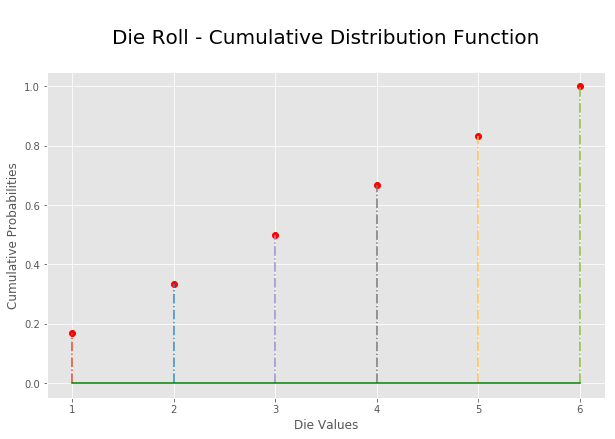

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,6))

plt.stem(die_lst, die_cum, '-.', 'ro', 'g-')
plt.xlabel('Die Values')
plt.ylabel('Cumulative Probabilities')
plt.title("\nDie Roll - Cumulative Distribution Function\n", fontsize=20)
plt.show();

## Level Up (optional)

cdfs (and pmfs) can be calculated using built in numpy and matplotlib methods. So we don't have create custom functions to calculate these. We can draw a histogram styled cdf as shown below using following methods. 

You would need to perform these steps
* Use `np.histogram()` to automatically calculate the histogram with probabilities. [Here is numpy histogram documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) to help you dig deeper.

* Use [`plt.step()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.step.html) method with [`np.cumsum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) to calculate and plot cumulative probabilities (just like we did above). 


In [4]:
import numpy as np

sample = [1,2,3,4,5,6]
hist = np.histogram(sample, bins=6, range=(1, 7), normed=True)
hist

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]), array([1., 2., 3., 4., 5., 6., 7.]))

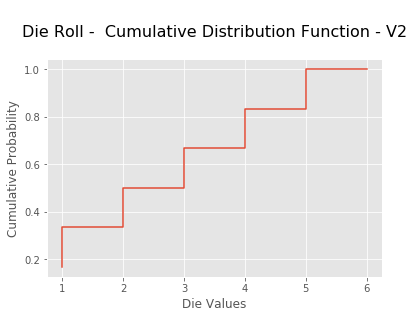

In [7]:
plt.step(hist[1][:-1], np.cumsum(hist[0]))
plt.title ("\nDie Roll -  Cumulative Distribution Function - V2\n", fontsize=16);
plt.xlabel("Die Values")
plt.ylabel("Cumulative Probability")
plt.show();

## Summary 

In this lesson we looked at developing a cdf a percentile function of a discrete random variable. We looked at how to calculate and visualize a cdf. This technique can also be applied to continuous random variables which we shall see later in this section. 